# AC_combined_LC

* combining :
  * SDSS(r),  
  * PTF(g,R) -- SDSS(g-i) --> SDSS(r,synth) 
  * PS1(g,r,i) -- SDSS(g-i) --> SDSS(r,synth)
  * CRTS(V) -- SDSS(g-i) --> SDSS(r,synth)
  
using offsets from `AC_SDSS-PS1_offsets.ipynb`,   `AC_SDSS-PTF_offsets.ipynb`, derived with SDSS standard stars cross matched to the relevant surveys . 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import Column
from astropy.table import join
import celerite
import modules as mod
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

#outDir = '../data_products/SDSS-PTF-CRTS-PS1_/'
#done_lcs = os.listdir(outDir)
#done_lcs.remove('.DS_Store')

In [3]:
# Read the summary table with median SDSS, PS1, PTF, CRTS  band magnitude  per object ... 
summary = Table.read('summary_combined_lc_info.txt', format='ascii') 


In [156]:
# Read in the offsets tables 
# All are calculated fitting 1st order polynomial ... 

offset_files = ['Offsets_CRTSV-SDSSr_SDSSgi_ext-NO.txt',
                'Offsets_PTFg-SDSSr_SDSSgi_ext-NO.txt',
                'Offsets_PTFR-SDSSr_SDSSgi_ext-NO.txt',
                'Offsets_PS1-SDSSr_SDSSgi_ext-NO.txt']  

offsets = {}
i =0   
for file in offset_files : 
    offsets[i] = Table.read(file,format='ascii')
    i += 1 


In [157]:
# recast the offsets as one table ...
a = [] # <SDSScolor>
b = ['crts', 'ptf', 'ptf', 'ps1', 'ps1', 'ps1'] # originsurvey 
c = [] # originband 
c1 = ['w', '2','1', 'g', 'r' , 'i']
d = np.repeat('r',len(b)) # targetband
e = []  # B0
f = []  # B1 
print('SDSS_color  origin_band  B0  B1 ')
for i  in range(len(offsets)):
    for j in range(len(offsets[i]['x'])):
        print(offsets[i]['x'][j][:5], offsets[i]['y'][j][:1],offsets[i]['B_0'][j],
             offsets[i]['B_1'][j])
        a.append(offsets[i]['x'][j][:5])
        c.append(offsets[i]['y'][j][:1])
        e.append(offsets[i]['B_0'][j])
        f.append(offsets[i]['B_1'][j])
        
off = Table(data=[a,b,c,c1, d,e,f], names = ['SDSScolor', 'originSurvey', 
                                         'originBand',  'codeBand', 
                                             'targetBand', 
                                         'B0', 'B1'])
off.write('Offsets_to_SDSSr_combined.txt', format='ascii',
         overwrite=True)

SDSS_color  origin_band  B0  B1 
(g-i) V -0.0421976405211 -0.00149211192754
(g-i) g -0.0294319326746 0.640361140012
(g-i) R 0.00583912129593 -0.101903245386
(g-i) g 0.0194068186375 0.62069270975
(g-i) r 0.00568245102856 -0.00139976313334
(g-i) i 0.0247370505198 -0.276547509953


In [158]:
# show the linear transformation table 
off

SDSScolor,originSurvey,originBand,codeBand,targetBand,B0,B1
str5,str4,str1,str1,str1,float64,float64
(g-i),crts,V,w,r,-0.0421976405211,-0.00149211192754
(g-i),ptf,g,2,r,-0.0294319326746,0.640361140012
(g-i),ptf,R,1,r,0.00583912129593,-0.101903245386
(g-i),ps1,g,g,r,0.0194068186375,0.62069270975
(g-i),ps1,r,r,r,0.00568245102856,-0.00139976313334
(g-i),ps1,i,i,r,0.0247370505198,-0.276547509953


In [185]:
# pick the LCs with best frequency ...
m1 = summary['SDSS_rN'] > np.percentile(summary['SDSS_rN'],80)
m2 = summary['PS1_rN'] > np.percentile(summary['PS1_rN'],80)


summary[m1*m2]

lcname,SDSS_uN,SDSS_medianuerr,SDSS_medianumag,SDSS_gN,SDSS_mediangerr,SDSS_mediangmag,SDSS_rN,SDSS_medianrerr,SDSS_medianrmag,SDSS_iN,SDSS_medianierr,SDSS_medianimag,SDSS_zN,SDSS_medianzerr,SDSS_medianzmag,PS1_gN,PS1_mediangerr,PS1_mediangmag,PS1_rN,PS1_medianrerr,PS1_medianrmag,PS1_iN,PS1_medianierr,PS1_medianimag,PS1_zN,PS1_medianzerr,PS1_medianzmag,PS1_yN,PS1_medianyerr,PS1_medianymag,PTF_1N,PTF_median1err,PTF_median1mag,PTF_2N,PTF_median2err,PTF_median2mag,CRTS_wN,CRTS_medianwerr,CRTS_medianwmag
str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10579.txt,113.0,0.038,19.431,106.0,0.013,18.764,110.0,0.011,18.4855,113.0,0.013,18.391,113.0,0.03,18.18,11.0,0.0113328,18.319703,23.0,0.0123926,18.306998,10.0,0.01184665,18.226254,13.0,0.0212196,18.020512,12.0,0.04265585,18.0095825,0.0,nan,nan,3.0,0.056,18.441,212.0,0.08,18.465
177186.txt,112.0,0.036,19.3605,118.0,0.0165,19.2865,119.0,0.015,18.994,117.0,0.019,18.975,117.0,0.051,19.046,9.0,0.0183717,19.106258,20.0,0.01552605,18.842428,7.0,0.020585,18.896777,10.0,0.04065875,19.040943,7.0,0.062411,18.965022,0.0,nan,nan,81.0,0.073,18.887,247.0,0.17,18.92
948053.txt,66.0,0.1505,21.202,66.0,0.035,20.8285,70.0,0.0355,20.513,66.0,0.032,20.1355,64.0,0.109,20.005,5.0,0.0464421,20.474868,20.0,0.05179385,20.2860385,13.0,0.0499078,19.830333,11.0,0.0755513,19.849815,6.0,0.1631845,19.708881,0.0,nan,nan,25.0,0.109,20.203,125.0,0.28,20.23
3950223.txt,114.0,0.0475,19.7965,115.0,0.02,19.693,119.0,0.02,19.572,120.0,0.019,19.102,116.0,0.044,18.908,11.0,0.0223303,19.5247,31.0,0.0291703,19.484053,11.0,0.0188507,18.973858,9.0,0.0319839,18.763468,9.0,0.0713391,18.738611,0.0,nan,nan,20.0,0.056,19.2985,406.0,0.15,19.125
1364850.txt,79.0,0.116,21.032,80.0,0.04,20.9455,81.0,0.037,20.553,80.0,0.0415,20.327,80.0,0.1095,19.953,15.0,0.0895982,21.128452,20.0,0.07479715,20.6738765,10.0,0.0651323,20.5339465,11.0,0.0955267,20.185534,4.0,0.146807,19.9458555,0.0,nan,nan,13.0,0.169,20.712,95.0,0.31,20.1
230288.txt,73.0,0.082,20.521,84.0,0.027,20.3605,86.0,0.029,20.119,84.0,0.041,20.193,86.0,0.136,20.1545,8.0,0.05133135,20.634603,21.0,nan,nan,10.0,0.0532762,20.3287215,11.0,0.111631,20.081069,4.0,0.155184,20.001753,0.0,nan,nan,12.0,0.1585,20.471,170.0,0.21,20.12
129563.txt,97.0,0.059,20.19,99.0,0.024,19.881,109.0,0.024,19.783,108.0,0.033,19.8735,105.0,0.09,19.715,9.0,0.0311087,19.899566,22.0,0.0407563,19.808827,9.0,0.0399409,19.912139,10.0,0.07309105,19.6870345,8.0,0.118195,19.5706305,0.0,nan,nan,20.0,0.087,19.921,136.0,0.13,19.75
3959404.txt,107.0,0.024,18.785,114.0,0.013,18.6995,117.0,0.014,18.695,118.0,0.015,18.43,115.0,0.029,18.301,13.0,0.0214475,19.263859,25.0,0.021778,19.195145,13.0,0.0168069,18.882065,11.0,0.0343093,18.692126,11.0,0.0629425,18.776023,0.0,nan,nan,19.0,0.061,19.277,346.0,0.13,18.725
2447561.txt,101.0,0.025,18.784,103.0,0.012,18.002,103.0,0.01,17.817,103.0,0.012,17.732,100.0,0.02,17.5745,19.0,0.0101468,18.018618,21.0,0.00860813,17.878719,20.0,0.008355195,17.7513335,13.0,0.0160757,17.617215,19.0,0.0370902,17.674271,0.0,nan,nan,67.0,0.037,17.883,413.0,0.1,17.71


The below takes few mins if executed for all 6444 light curves ... 

In [200]:
# the input combined  LCs
lcDir = '../data_products/SDSS-PTF-CRTS-PS1_/'
saveDir = '../data_products/Combined_LC/'

# lcs = os.listdir(lcDir)
#lcname = lcs[8] # '10579.txt'

# combine only the longer lcs now for illustration ...

# combine all lcs ... 
# lcs = summary['lcname']

# combine only selected lcs to avert minor glitch 
lcs = ['1987463.txt', '1088546.txt', '1072282.txt', '1475888.txt']

for lcname in lcs  :

    lc = Table.read(lcDir+lcname, format='ascii')

    # extract the color info about 
    # this QSO from the survey 
    row = summary[summary['lcname'] == lcname]
    #sdss_gr = row['SDSS_mediangmag'][0] -row['SDSS_medianrmag'][0]
    sdss_gi = row['SDSS_mediangmag'][0] -row['SDSS_medianimag'][0]
    #print('SDSS g-r = ', SDSS_gr, '\nSDSS g-i = ', SDSS_gi)

    # take the 'true' SDSS r...
    mask = (lc['survey'] == 'sdss') & (lc['filter'] == 'r')
    lc2 = lc[mask].copy()

    lcs = {}
    for i in range(len(off)):

        # select the survey and originBand combination 
        m = (lc['survey'] == off['originSurvey'][i])  & \
            (lc['filter'] == off['codeBand'][i])

        # make a copy 
        lcs[i]  = lc[m].copy()

        # apply transformation 
        lcs[i]['mag'] = lcs[i]['mag'] - off['B0'][i] - off['B1'][i] * sdss_gi

        # stack 
        lc2 = vstack([lc2, lcs[i]])

    # rename columns to prevent possible confusion : 
    # all was transformed to the target SDSS r band 
    # and this only indicates what was the 
    # origin Band and the origin Survey ... 
    lc2.rename_column('filter', 'originBand')
    lc2.rename_column('survey', 'originSurvey')  
    
    # remove obviously bad points 
    m1 = lc2['mag'] < 0 
    m2 = lc2['mjd'] < 10000
    m = m1 | m2 
    lc2.remove_rows(m)
    
    # remove 3 sigma outliers ... 
    #m = np.abs(np.mean(lc2['mag']) - lc2['mag']) > 3 * np.std(lc2['mag'])
    #lc2.remove_rows(m)
    #fig,ax = plt.subplots(1,1)
    #ax.scatter(lc2['mjd'], lc2['mag'])
    #ax.scatter(lc2['mjd'][m], lc2['mag'][m])

    lc2.write(saveDir+lcname, format='ascii', overwrite=True)
    

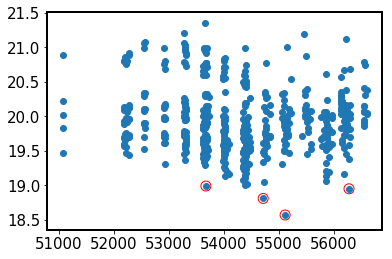

In [190]:
plt.scatter(lc['mjd'], lc['mag']) 
m = lc['mag'] < 19
plt.scatter(lc['mjd'][m], lc['mag'][m], s=100, facecolors='none', edgecolors='r')

## Illustrate the combined LCs .... 

'932097'

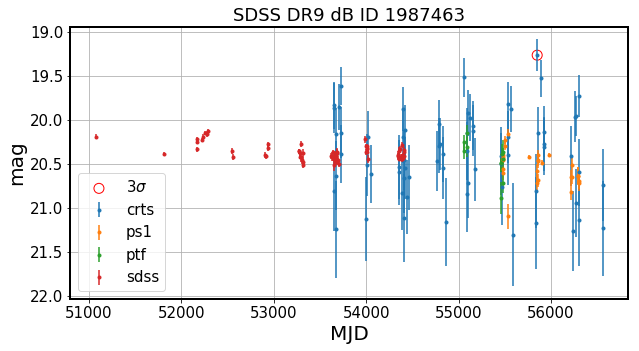

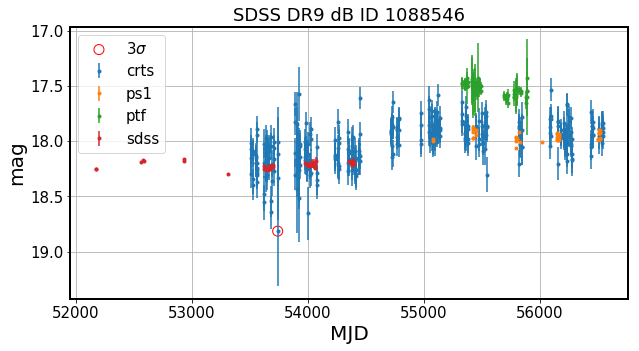

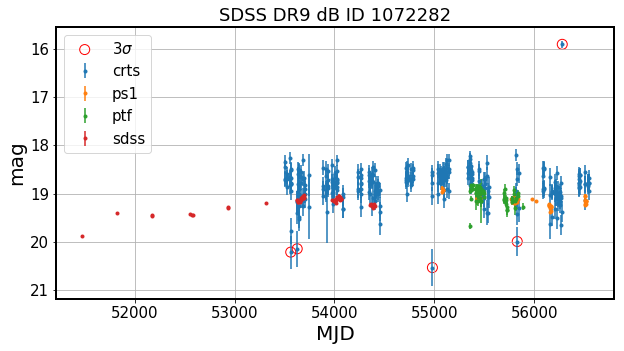

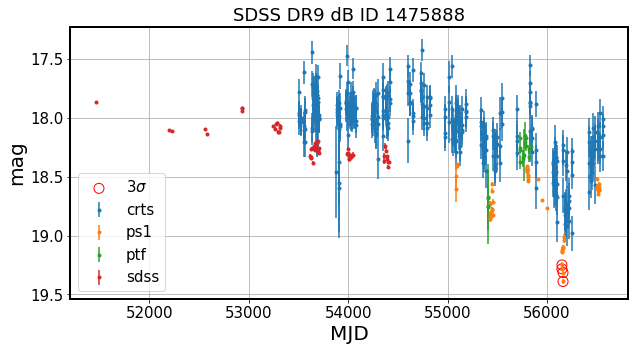

In [201]:
%matplotlib inline

#lcs = os.listdir(saveDir)
lcs = ['1987463.txt', '1088546.txt', '1072282.txt', '1475888.txt']
for i in range(len(lcs)):
    lc = Table.read(saveDir+lcs[i], format='ascii')
    fig,ax  = plt.subplots(1,1,figsize = (10,5))
    for survey in np.unique(lc['originSurvey']):
        m = lc['originSurvey'] == survey
        ax.errorbar(lc['mjd'][m], lc['mag'][m], lc['magerr'][m], 
                label=survey, fmt=".", capsize=0)
        
    # flag 3 sigma outliers , in the context of the entire light curve 
    m = np.abs(np.mean(lc['mag']) - lc['mag']) > 3 * np.std(lc['mag'])
    ax.scatter(lc['mjd'][m], lc['mag'][m],
               s=100, facecolors='none', edgecolors='r', label='3'+r'$\sigma$')
    
    ax.legend(fontsize=15)
    ax.set_xlabel('MJD')
    ax.set_ylabel('mag')
    ax.set_title('SDSS DR9 dB ID ' + lcs[i][:-4])
    ax.grid()
    ax.invert_yaxis()
    plt.savefig('../data_products/Combined_LC_figs/'+lcs[i][:-3] + 'png', 
                bbox_inches='tight')

What I see is that there are some outlier points that probably should be excluded. Also,  it is apparent that CRTS has much larger uncertainties than other surveys.  

But then in the fitting process  some points do get ignored.... 